In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
import seaborn as sns

In [8]:
data = pd.read_csv('dataset_ozone.csv')

In [9]:
data.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


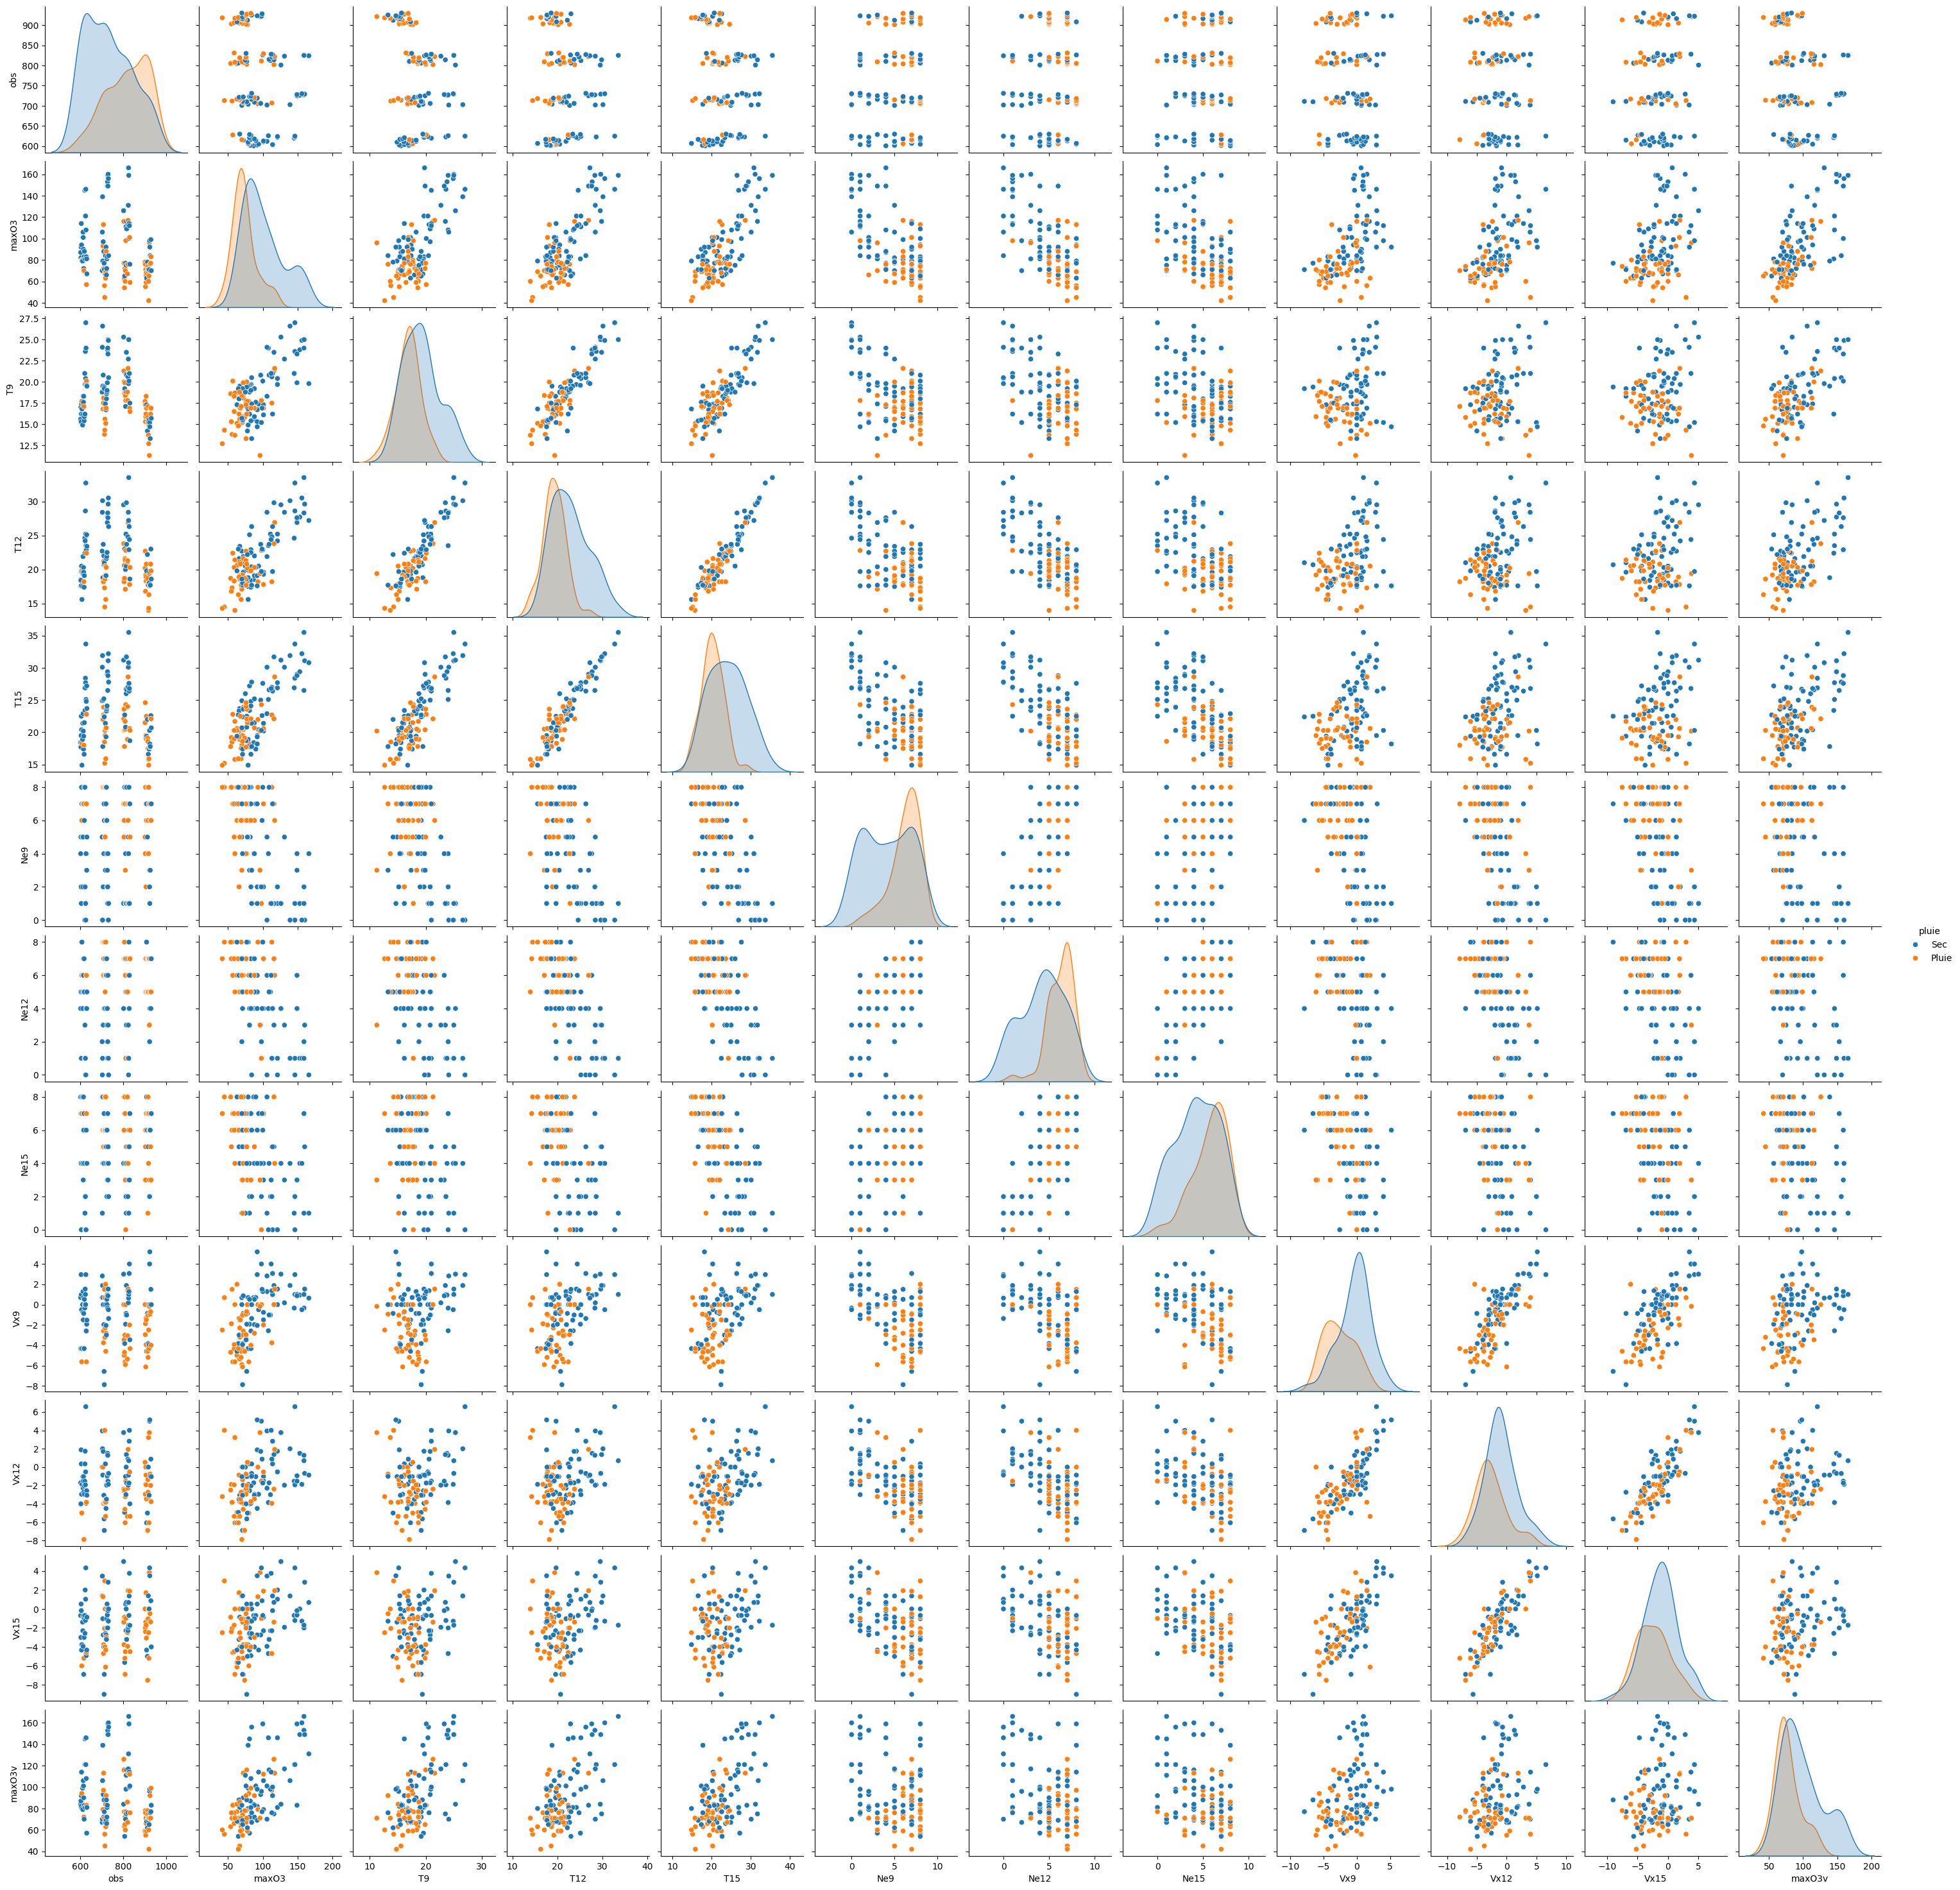

In [11]:
sns.pairplot(data, hue='pluie')

<Axes: xlabel='T12', ylabel='maxO3'>

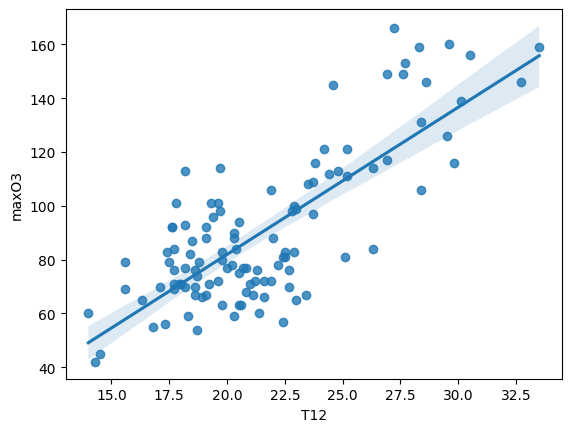

In [21]:
sns.regplot(x='T12', y='maxO3', data=data, )

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
reg_simp = smf.ols('maxO3 ~ T12', data=data).fit()

In [24]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.51e-24
Time:                        19:22:35   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.0

In [17]:
from scipy.stats import spearmanr, pearsonr


r, p_value = spearmanr(data['T12'], data['maxO3'])
print(r, p_value)

0.6194628881897815 3.307196354709628e-13
